In [1]:
import pandas as pd
housing_df=pd.read_csv("housingdata.csv")
housing_df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


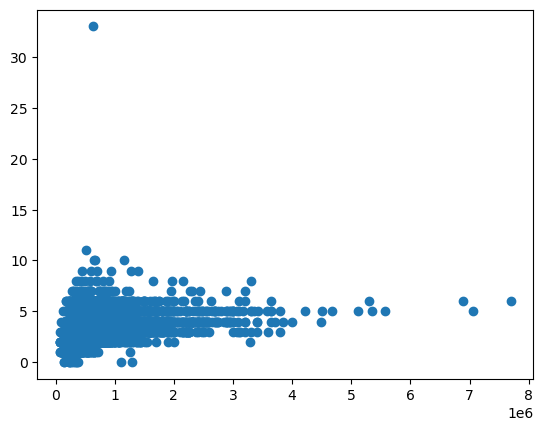

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=housing_df['Sale Price'],y=housing_df['No of Bedrooms'])

In [5]:
import seaborn as sns

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = housing_df["Sale Price"].quantile(0.25)
q3 = housing_df["Sale Price"].quantile(0.75)

In [8]:
# Interquartile Range (IQR)
iqr = q3 - q1


In [9]:
# Calculate upper and lower limits for outliers
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [10]:
# Function to cap the outliers
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value

In [12]:
# Apply the capping function to the Sale_Price column
housing_df['Sale Price'] = housing_df['Sale Price'].apply(limit_imputer)


In [13]:
# Summary statistics after treating outliers
print(housing_df['Sale Price'].describe())

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64


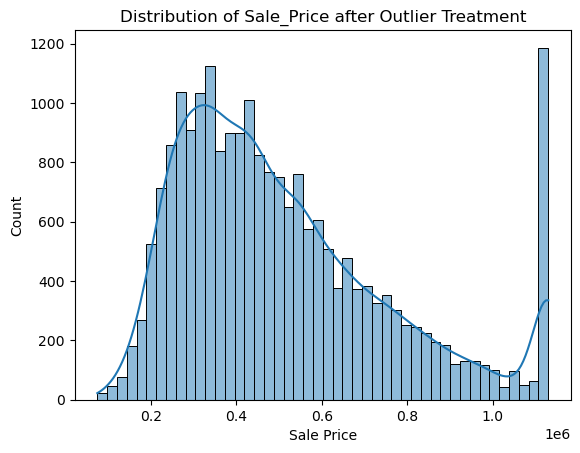

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution
sns.histplot(housing_df['Sale Price'], kde=True)
plt.title('Distribution of Sale_Price after Outlier Treatment')
plt.show()


In [16]:
# Drop rows with missing values in 'Sale_Price' column
housing_df.dropna(inplace=True, axis=0, subset=['Sale Price'])


In [17]:
print(housing_df.shape)       # To confirm rows were deleted
print(housing_df.head())      # Preview first few rows


(21609, 21)
           ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Overall Grade  \
0              No                 NaN  ...             7   
1             

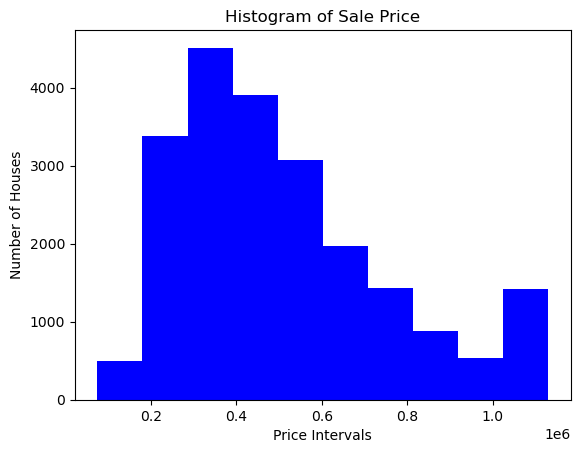

In [18]:
import matplotlib.pyplot as plt

# Plot a histogram of Sale_Price
plt.hist(housing_df["Sale Price"], bins=10, color="blue")
plt.xlabel("Price Intervals")
plt.ylabel("Number of Houses")
plt.title("Histogram of Sale Price")
plt.show()
